# Particle Deposition Measurements

Particle Deposition Measurements for different partitionings of the lungs/airways are stored in measurement tables:
`*_NearAciniDeposition.csv`, `*_SublobesDeposition.csv`, `*_LobesDeposition.csv` and `*_AirwaySegmentsDeposition.csv`.

In the example below we utilize `pandas` for loading the csv files and `matplotlib` for visualization of data. 

In [1]:
import os, pandas, matplotlib, numpy
import matplotlib.pyplot as plt

First, we download some example data from the `lapdMouse` data archive using the `lapdMouseUtils` module which is part of the [lapdMousePythonExamples](https://github.com/lapdMouse/lapdMousePythonExamples).

In [2]:
from lapdMouseUtils import DBUtil
db=DBUtil()
db.downloadFile('m01/m01_NearAciniDeposition.csv')
db.downloadFile('m01/m01_SublobesDeposition.csv')
db.downloadFile('m01/m01_LobesDeposition.csv')
db.downloadFile('m01/m01_AirwaySegmentsDeposition.csv')

## NearAciniDeposition
The **NearAciniDeposition** measurements contain for each near acini compartment (from labelmap `*_NearAcini.nrrd`), following information
  * **volume**: volume of compartment in (mm^3)
  * **mean, sigma, median, min, max**: Aerosol depositon measurements for the compartment (average, standard deviation, median, min and max value)
  * **count**: number of voxels in the compartment
  * **centroidX, centroidY, centroidZ**: 3d center of gravity of the compartment
  * **bbox...**: axis aligned bounding box around the compartment

In [3]:
df = pandas.read_csv('m01/m01_NearAciniDeposition.csv', index_col='label')
df.head(10)

,volume,mean,sigma,median,min,max,count,centroidX,centroidY,centroidZ,bboxXStart,bboxXEnd,bboxYStart,bboxYEnd,bboxZStart,bboxZEnd
label,,,,,,,,,,,,,,,,
1,8.22704,1.031340,2.137040,0.7325,0.000000,1250.950,10390032,16.5802,14.6865,10.44480,15.3854,18.6778,12.3941,16.6349,9.17728,11.92860
2,7.71769,1.100490,1.033440,0.9225,0.000000,192.196,9746768,17.4658,15.8120,7.92708,15.4402,19.2067,14.1634,16.8538,6.49264,9.26296
3,7.61877,0.987355,1.014850,0.8275,0.000000,200.326,9621848,16.7473,15.6950,6.22215,15.1118,18.1306,13.6526,16.8538,5.17888,7.53032
4,6.88493,1.248200,1.071980,1.0975,0.000000,168.120,8695072,17.5830,12.6179,9.03442,15.4219,18.8784,11.1173,14.3184,7.69216,10.50060
5,6.69917,0.923889,0.939228,0.7725,0.000000,165.881,8460464,17.4859,15.6902,4.60729,15.5861,18.9149,14.5099,16.7443,3.67472,5.56920
6,6.55689,1.194010,1.040030,1.0275,0.000110,361.282,8280784,18.8632,12.7301,7.99486,17.1000,20.5930,10.6978,14.4461,6.39744,9.70088
7,6.17931,1.015730,1.179390,0.8025,0.000000,250.362,7803928,18.5660,13.8924,14.75790,17.3006,20.3558,12.4670,15.5040,13.76590,16.36490
8,5.69840,0.998440,1.017450,0.8075,0.000000,138.788,7196584,16.0100,13.8366,8.42506,15.0936,18.0758,12.4123,15.4675,7.48272,9.85320
9,5.64017,0.744193,0.911524,0.5875,0.000000,144.690,7123040,20.9516,13.6374,4.05625,19.7448,22.3622,12.3029,15.3581,1.99920,5.39784


A scatter plot comparing the volume with the mean deposition of the near acini structures can be obtain as:

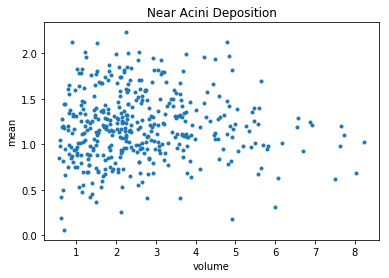

In [4]:
plt.figure()
plt.plot(df['volume'], df['mean'], '.')
plt.xlabel('volume')
plt.ylabel('mean')
plt.title('Near Acini Deposition');

We define an auxiliary function `viualizeCompartments`, using spheres of identical volume to represent the compartments in a 2d projection of the 3d data

In [5]:
def visualizeCompartments(data, value=None, cmap=None, alpha=1.0):
  if not cmap: cmap=matplotlib.cm.get_cmap('gray')
  plt.figure(figsize=(8,10))
  for index, row in df.iterrows():
    if 'volume' in row:
      r=pow(3.0/4.0*row['volume']/numpy.pi,1.0/3.0)
    else:
      r=pow(1.0/4.0*row['area']/numpy.pi,1.0/2.0)
    c = 'lightgray'
    if value is not None:
      if isinstance(cmap, dict):
        if (index in value) and (value[index] in cmap): c = cmap[value[index]]
      else:
        c = cmap(value[index])
    a = alpha*0.5 if c=='lightgray' else alpha
    circle = matplotlib.patches.Circle((row['centroidX'],row['centroidZ']),
      radius=r,color=c,alpha=a,zorder=-row['centroidY'])
    plt.gca().add_patch(circle)
  plt.axis('equal');
  plt.show()

This allows visualization of e.g. the arosol deposition in the compartments or to identify the 10% of the smallest near acini structures

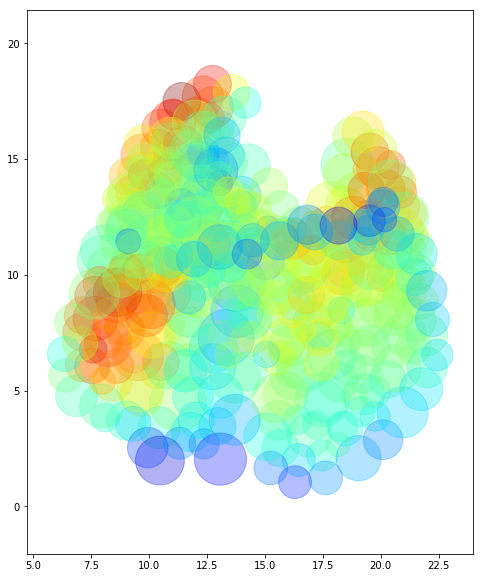

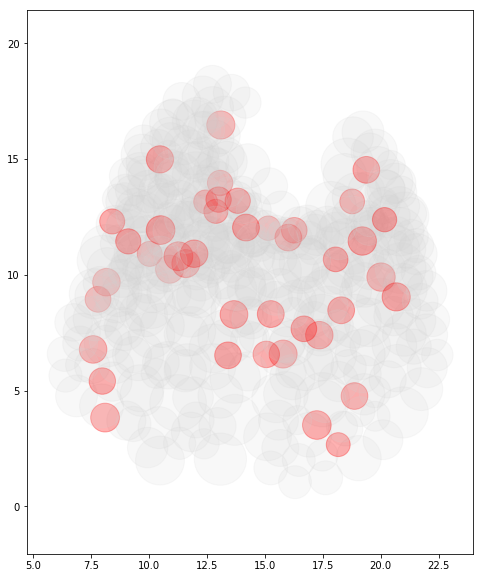

In [6]:
visualizeCompartments(df,df['mean']/df['mean'].max(),matplotlib.cm.get_cmap('jet'),0.3)
visualizeCompartments(df,df['volume']<df['volume'].quantile(0.1), {True:'red'},0.3)

## SublobesDeposition
The **SublobesDeposition** measurements contain for each sublobe compartment (from labelmap `*_Sublobes.nrrd`), similar information as is stored for the near acini structures (see above)

In [7]:
df = pandas.read_csv('m01/m01_SublobesDeposition.csv', index_col='label')
df.head(10)

,volume,mean,sigma,median,min,max,count,centroidX,centroidY,centroidZ,bboxXStart,bboxXEnd,bboxYStart,bboxYEnd,bboxZStart,bboxZEnd
label,,,,,,,,,,,,,,,,
4,88.87310,1.42597,1.63153,1.2075,0.0,1149.260,112238936,19.89590,11.28810,13.39500,16.78990,22.3622,6.50256,15.7958,9.67232,17.24070
776,33.97730,1.31556,1.74817,1.0775,0.0,1077.740,42910336,9.49958,15.01250,5.27168,6.73968,12.1843,12.55820,17.2915,2.57040,7.62552
584,4.33176,1.17607,1.20077,1.0325,0.0,259.296,5470640,16.42790,10.83950,11.57870,14.32750,17.8022,9.32976,12.6950,10.37680,12.89960
200,4.62368,1.30563,1.80785,1.1225,0.0,730.565,5839304,11.26430,13.26920,14.27810,10.05940,12.6586,12.08400,14.3731,12.85200,16.09830
972,7.76271,1.00001,1.02842,0.8425,0.0,200.326,9803624,16.75070,15.68380,6.22228,15.11180,18.1306,13.65260,16.8538,5.17888,7.53032
10,75.40670,1.27498,1.64045,1.0825,0.0,1358.520,95232072,19.92480,11.75660,9.93724,15.40370,22.9459,7.34160,15.8323,5.57872,13.48980
12,80.48210,1.38135,2.65332,1.1025,0.0,3613.970,101641912,11.59150,10.77520,15.82750,8.58192,15.0115,6.46608,15.2486,11.59540,18.99240
1170,3.02401,1.04103,1.03714,0.8875,0.0,193.331,3819064,18.16730,8.34396,11.30240,17.42830,19.0790,7.01328,10.3786,9.93888,12.48070
402,9.40807,1.12286,1.12043,0.9375,0.0,192.196,11881568,17.62110,15.85160,7.80821,15.44020,19.3709,14.16340,16.8538,6.43552,9.26296


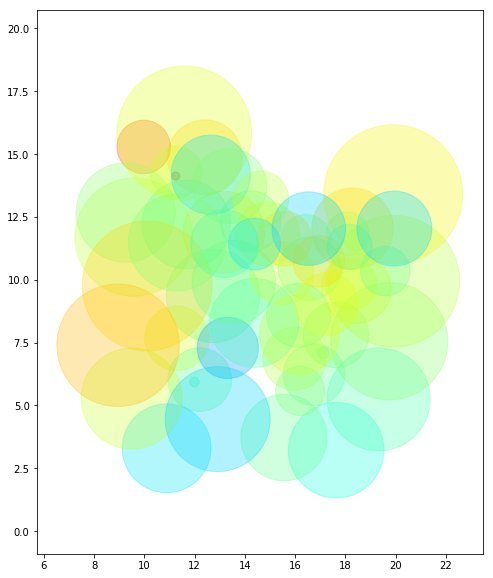

In [8]:
visualizeCompartments(df,df['mean']/df['mean'].max(),matplotlib.cm.get_cmap('jet'),0.3)

## LobesDeposition
The **LobesDeposition** measurements contain for each of the 5 lung lobes (from labelmap `*_Lobes.nrrd`), similar information as is stored for the near acini structures and sublobes (see above).

In [9]:
df = pandas.read_csv('m01/m01_LobesDeposition.csv', index_col='label')
df.head(10)

,volume,mean,sigma,median,min,max,count,centroidX,centroidY,centroidZ,bboxXStart,bboxXEnd,bboxYStart,bboxYEnd,bboxZStart,bboxZEnd
label,,,,,,,,,,,,,,,,
1,389.459,1.19398,1.51578,0.9775,0,1519.83,491852424,18.8425,13.07570,8.97666,14.14510,22.9459,6.50256,16.8538,0.34272,17.2407
2,193.899,1.32525,2.22166,1.0675,0,3613.97,244877152,10.6639,12.47210,14.00850,6.72144,15.0115,6.46608,17.1821,8.05392,18.9924
3,142.969,1.02034,1.21173,0.8525,0,1338.54,180557992,13.1608,8.40938,12.35090,7.37808,19.4438,4.60560,14.7014,9.72944,16.0602
4,311.399,1.23165,1.83502,0.9575,0,1601.20,393269544,10.9123,13.82190,7.59088,5.66352,15.3398,7.14096,17.2915,0.83776,14.8226
5,116.628,1.10687,1.31473,0.9375,0,2254.13,147290392,16.1631,10.34140,9.71351,10.55180,21.6144,5.22576,14.9203,4.07456,14.4799


The utilized labels (1-5) correspond to specific lung lobes:
  * **1**: left
  * **2**: cranial
  * **3**: middle
  * **4**: caudal
  * **5**: accessory

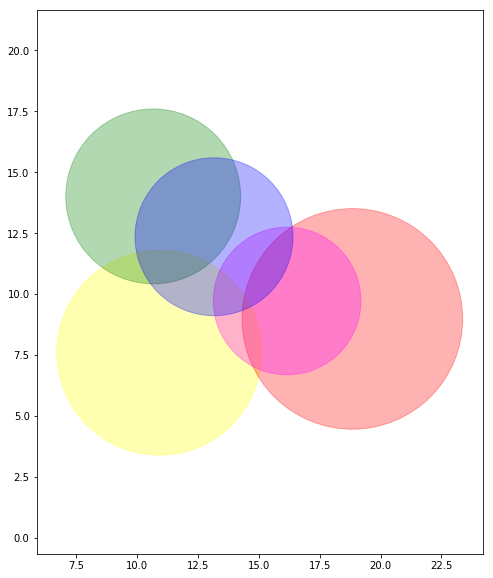

In [10]:
lobeNames={1:'left',2:'cranial',3:'middle',4:'caudal',5:'accessory'}
colorForLobe={1:'red',2:'green',3:'blue',4:'yellow',5:'magenta'}
visualizeCompartments(df,{i:i for i in df.index},colorForLobe,0.3)

A pie chart showing the distribution of the lung volume between the lobes.

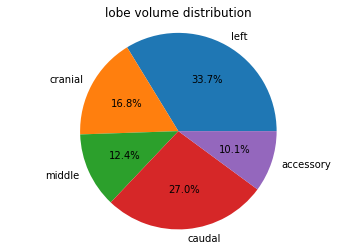

In [11]:
fig, ax = plt.subplots()
ax.pie(df['volume'].values, labels=[lobeNames[i] for i in df.index],
  autopct='%1.1f%%')
plt.title('lobe volume distribution')
ax.axis('equal');

## AirwaySegmentsDeposition
The **AirwaySegmentsDeposition** measurements for each airway segment (from `*AirwaySegments.vtk`), contain information about the arersol deposition near the airway wall (not the whole volume inside of the segment). Stored information is simlar to those stored for near acini structures and sublobes (see above), however, the measuremnt region is a surface `area` instead of a `volume` (column 2).

In [12]:
df = pandas.read_csv('m01/m01_AirwaySegmentsDeposition.csv', index_col='label')
df.head(10)

,area,mean,sigma,median,min,max,count,centroidX,centroidY,centroidZ,bboxXStart,bboxXEnd,bboxYStart,bboxYEnd,bboxZStart,bboxZEnd
label,,,,,,,,,,,,,,,,
1,17.229600,0.239328,1.47824,0.085268,-0.000004,49.62990,4423,15.8234,12.4146,21.0647,14.5986,16.8049,11.2997,13.6001,19.1502,23.0699
2,24.967800,0.442042,2.38286,0.123681,-0.000050,137.68900,6115,16.3150,13.1261,15.8510,15.4892,17.8496,11.9995,14.2744,13.2214,19.3063
3,24.407300,0.862532,7.66177,0.124027,-0.005967,431.25500,6442,14.7392,13.3140,17.4631,13.3377,16.2626,11.9451,14.7662,15.3042,23.0444
4,2.523820,0.999511,3.40468,0.485247,0.000020,75.04160,712,17.8451,12.6914,13.4499,17.2078,18.5382,12.2484,13.2597,12.8324,14.1438
5,10.615500,0.816460,2.53076,0.433926,0.000041,116.64700,2892,17.0132,13.4307,12.4336,15.9737,18.1046,12.4184,14.3298,11.2289,13.4835
6,4.591510,1.545260,13.83300,0.494092,0.000124,307.40000,1292,13.0400,13.7251,15.4829,12.2237,13.6154,13.0726,14.3768,14.6155,16.4850
7,9.499000,0.276597,1.27958,0.075339,0.001177,41.91200,2459,14.3623,13.8821,14.8122,13.0671,15.4670,12.7719,14.9292,13.8019,15.7819
8,0.646493,1.939350,1.84073,0.758713,0.518454,18.44190,203,18.5271,12.6566,13.7374,18.1877,18.8791,12.3295,13.0060,13.4630,14.0547
9,1.120630,1.661840,1.06396,1.279240,0.431609,9.55642,312,18.4440,12.6574,13.0090,17.9515,18.9057,12.1902,13.1471,12.7446,13.5124


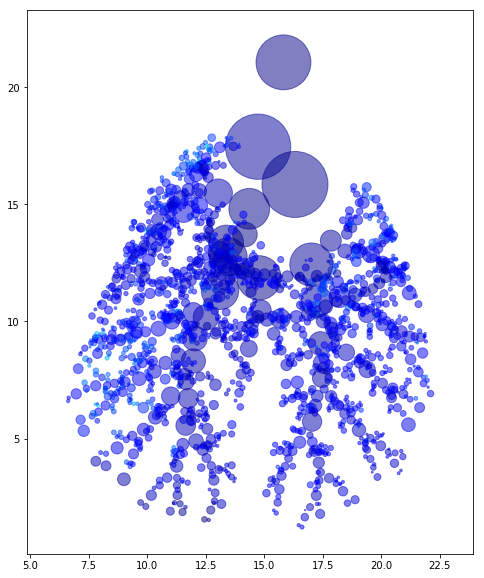

In [13]:
visualizeCompartments(df,df['mean']/df['mean'].max(),matplotlib.cm.get_cmap('jet'),0.5)